# Schelling segregation model



## Exercise

In [1]:
%%HTML
<iframe src="https://www.openprocessing.org/sketch/437057/embed/" width="500" height="500"></iframe>

## Exercise

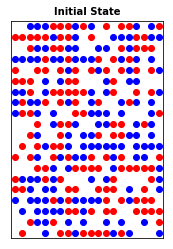

In [44]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import itertools
import random
import copy
    
class Schelling:
    def __init__(self, width, height, empty_ratio, similarity_threshold, n_iterations, races = 2):
        self.width = width 
        self.height = height 
        self.races = races
        self.empty_ratio = empty_ratio
        self.similarity_threshold = similarity_threshold
        self.n_iterations = n_iterations
        self.empty_houses = []
        self.agents = {}

    def populate(self):
        self.all_houses = list(itertools.product(range(self.width),range(self.height)))
        random.shuffle(self.all_houses)

        self.n_empty = int( self.empty_ratio * len(self.all_houses) )
        self.empty_houses = self.all_houses[:self.n_empty]

        self.remaining_houses = self.all_houses[self.n_empty:]
        houses_by_race = [self.remaining_houses[i::self.races] for i in range(self.races)]
        for i in range(self.races):
            #create agents for each race
            self.agents.update(dict(zip(houses_by_race[i], [i+1]*len(houses_by_race[i]))))
            #self.agents = dict(self.agents.items() + dict(zip(houses_by_race[i], [i+1]*len(houses_by_race[i]))).items())

    
    def is_unsatisfied(self, x, y):
        race = self.agents[(x,y)]
        count_similar = 0
        count_different = 0

        if x > 0 and y > 0 and (x-1, y-1) not in self.empty_houses:
            if self.agents[(x-1, y-1)] == race:
                count_similar += 1
            else:
                count_different += 1
        if y > 0 and (x,y-1) not in self.empty_houses:
            if self.agents[(x,y-1)] == race:
                count_similar += 1
            else:
                count_different += 1
        if x < (self.width-1) and y > 0 and (x+1,y-1) not in self.empty_houses:
            if self.agents[(x+1,y-1)] == race:
                count_similar += 1
            else:
                count_different += 1
        if x > 0 and (x-1,y) not in self.empty_houses:
            if self.agents[(x-1,y)] == race:
                count_similar += 1
            else:
                count_different += 1        
        if x < (self.width-1) and (x+1,y) not in self.empty_houses:
            if self.agents[(x+1,y)] == race:
                count_similar += 1
            else:
                count_different += 1
        if x > 0 and y < (self.height-1) and (x-1,y+1) not in self.empty_houses:
            if self.agents[(x-1,y+1)] == race:
                count_similar += 1
            else:
                count_different += 1        
        if x > 0 and y < (self.height-1) and (x,y+1) not in self.empty_houses:
            if self.agents[(x,y+1)] == race:
                count_similar += 1
            else:
                count_different += 1        
        if x < (self.width-1) and y < (self.height-1) and (x+1,y+1) not in self.empty_houses:
            if self.agents[(x+1,y+1)] == race:
                count_similar += 1
            else:
                count_different += 1

        if (count_similar+count_different) == 0:
            return False
        else:
            return float(count_similar)/(count_similar+count_different) < self.similarity_threshold

    def update(self):
        for i in range(self.n_iterations):
            plt.draw()
            self.old_agents = copy.deepcopy(self.agents)
            n_changes = 0
            for agent in self.old_agents:
                if self.is_unsatisfied(agent[0], agent[1]):
                    agent_race = self.agents[agent]
                    empty_house = random.choice(self.empty_houses)
                    self.agents[empty_house] = agent_race
                    del self.agents[agent]
                    self.empty_houses.remove(empty_house)
                    self.empty_houses.append(agent)
                    n_changes += 1
            #print(n_changes)
            if n_changes == 0:
                break
                
    def move_to_empty(self, x, y):
        race = self.agents[(x,y)]
        empty_house = random.choice(self.empty_houses)
        self.updated_agents[empty_house] = race
        del self.updated_agents[(x, y)]
        self.empty_houses.remove(empty_house)
        self.empty_houses.append((x, y))
        
    def plot(self, title, numSubplot):
        ax = plt.subplot(1,2,1)
        #If you want to run the simulation with more than 7 colors, you should set agent_colors accordingly
        agent_colors = {1:'b', 2:'r', 3:'g', 4:'c', 5:'m', 6:'y', 7:'k'}
        for agent in self.agents:
            ax.scatter(agent[0]+0.5, agent[1]+0.5, color=agent_colors[self.agents[agent]])

        ax.set_title(title, fontsize=10, fontweight='bold')
        ax.set_xlim([0, self.width])
        ax.set_ylim([0, self.height])
        ax.set_xticks([])
        ax.set_yticks([])

plt.figure(figsize=(16,8), dpi=72);
fig, ax = plt.subplots()

# Modify the similarity_threshold: 0.3, 0.5, 0.8
schelling_1 = Schelling(20, 20, 0.3, 0.3, 500, 2)
schelling_1.populate()
schelling_1.plot('Initial State', 1)
schelling_1.update()
#schelling_1.plot('Final State', 2)


# Modelo Axelrod de difusion cultural
Buscar si hayalgo: es contraintuitivo del comportamiento individusal frente al comportamiento social
# Modelo fast-effect
En aglomeraciones, salir de la discotca: El colectivo sale mas rapido si la gente sale mas lento.
Esta en C: http://panics.org/

# References
- Clark, W. AV. ["Residential preferences and neighborhood racial segregation: A test of the Schelling segregation
model."](http://smg.media.mit.edu/library/Clark.ResidentialSegregation.pdf) Demography 28.1 (1991): 1-19.
- Moujahid, A. ["An introduction to agent-based models: simulating segregation with Python"](https://www.binpress.com/tutorial/introduction-to-agentbased-models-an-implementation-of-schelling-model-in-python/144)